https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/#Text_classification_using_Word2Vec_Python

## Do general imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from scipy.stats import kruskal
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


pd.set_option('display.max_columns', None)

In [2]:
a = np.array([[1,1,1],[1,2,2],[1,3,3]])
a.mean(axis=0)

array([1., 2., 2.])

In [3]:
max_clusters = 40
vector_size = 300
author_role = 'reporter'

def vectorize(sentence, w2v_model):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(vector_size)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

## Load Datasets

In [4]:
utterances_df = pd.read_csv('./temp_data/pp_utterances.csv')
utterances_df = utterances_df[utterances_df['author_role'] == author_role]
utterances_df = utterances_df[~((utterances_df['author'].isin(['admin', 'u003']))
                                    & (utterances_df['comment_seq'] < 3)
                                    & (utterances_df['author_role'] == 'others'))]
print(len(utterances_df))
utterances_df.head(2)

5701


,id,issueid,created,author,actionbody,utr_seq,is_private,comment_seq,author_role,pp_actionbody,words_count,pp_words_count
0,211718014.0,1004298.0,2022-01-02 11:12:51+00:00,om.bmct.16,dear ps ph_user,0,0,0,reporter,ph_com_protocol p ph_user,3,3
1,211718014.0,1004298.0,2022-01-02 11:12:51+00:00,om.bmct.16,we need your urgent support to fix list of vul...,1,0,0,reporter,need urgent support fix list vulner report pro...,15,9


In [5]:
text = utterances_df['pp_actionbody'].astype(str)

sentences = [str(sentence).split() for sentence in text]
print('train model')
w2v_model = Word2Vec(sentences, vector_size=vector_size, window=5, min_count=5, workers=1,seed=42)
print('word2vec model built')

train model
word2vec model built


In [6]:
f_names = [f'f{i}' for i in range(0,vector_size)]
rows = []

for t in text:
    rows.append(vectorize(t, w2v_model))

df = pd.DataFrame(columns=f_names, data = rows)
print(len(df))

5701


In [7]:
df.head(1)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299
0,0.053756,-0.086341,0.098392,-0.220791,0.066774,-0.005531,0.21844,-0.000822,-0.114179,0.108883,0.007589,0.043884,0.007168,0.036999,-0.004585,-0.028419,-0.019478,-0.303774,-0.203563,-0.142849,0.125464,0.060351,-0.038237,0.277817,0.079014,0.017841,-0.270181,0.033306,0.036188,0.031114,-0.161805,-0.145582,0.02707,0.063939,0.034521,-0.099101,0.070181,-0.121645,0.159382,0.074593,0.029518,0.072964,-0.067742,-0.025525,0.078606,0.087843,0.139342,0.051673,0.075175,0.036919,-0.159982,0.002714,-0.042484,0.109181,0.29911,-0.057151,-0.095001,0.08951,-0.079772,-0.116992,-0.022205,0.092942,-0.067331,0.179785,-0.108736,0.05199,-0.041796,0.007121,-0.230624,0.071697,0.077617,0.032197,-0.177623,0.057232,-0.203179,0.012409,-0.079077,-0.03654,-0.045136,0.05738,0.078191,-0.059314,0.047902,0.036436,-0.075023,0.023801,-0.04323,-0.141516,0.111338,-0.069178,-0.056619,0.044199,0.032265,-0.2149,0.157293,-0.052681,-0.106523,0.025061,0.022165,0.087731,0.008914,0.079763,-0.153825,-0.019093,-0.154543,0.060755,0.132872,0.087721,0.096457,-0.222291,-0.111812,-0.037171,-0.137628,0.095822,-0.057456,-0.040931,0.050151,0.100633,-0.196827,-0.063549,0.009752,0.07712,0.024549,-0.000353,0.073944,-0.069871,-0.063825,0.196127,-0.148602,-0.150482,0.069221,-0.042815,-0.002771,0.048973,0.051186,0.058657,-0.012399,-0.075832,0.092463,0.063476,0.003185,-0.060058,0.186437,-0.000449,-0.014964,0.104506,-0.120215,0.040268,0.058781,0.020547,0.049964,-0.259899,0.128962,-0.094168,-0.044761,0.078236,-0.066616,-0.059272,-0.075103,0.065462,0.002562,-0.130035,-0.028068,0.026041,-0.026525,0.256301,0.139553,0.042979,0.028512,-0.04975,-0.117341,0.10143,0.089543,0.13495,-0.097285,-0.07697,0.011867,-0.062196,-0.09468,0.045477,0.132299,-0.069261,-0.025768,0.045304,-0.156164,0.1475,-0.062036,0.039397,0.007358,-0.076745,0.06152,0.182764,-0.142815,-0.030704,0.198694,-0.165302,-0.330879,-0.048936,-0.104275,0.035482,-0.033216,0.043365,-0.064478,0.02837,-0.049848,0.132051,0.032299,0.059866,0.038825,0.045081,-0.241853,0.103218,-0.027582,0.128057,-0.019992,-0.073561,-0.101891,-0.259086,0.104121,0.035894,-0.152254,0.105303,-0.120622,0.026646,0.002168,-0.08852,0.030321,0.186217,-0.080145,0.02924,0.094775,-0.130746,0.034901,0.040622,-0.114728,0.006617,0.00782,0.165644,0.008846,-0.059019,-0.191232,-0.089216,-0.027311,-0.019138,0.144148,0.002891,0.095693,0.116137,0.173248,-0.012403,0.040999,-0.168524,-0.102936,-0.054761,-0.068807,0.032755,-0.052224,-0.065682,-0.110697,0.156157,-0.128909,0.158017,-0.036454,0.098568,0.159883,-0.130394,0.091288,-0.100472,-0.158511,0.153069,0.051389,0.026243,0.020562,-0.15536,0.128329,0.003291,0.165062,0.118962,0

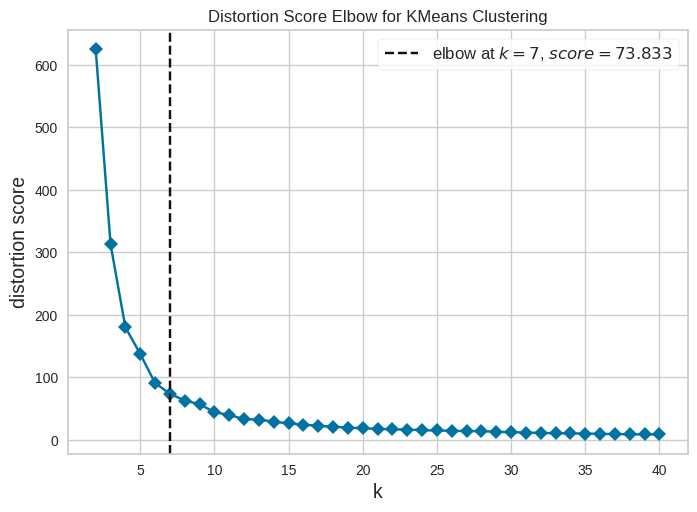

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
km = KMeans(n_init="auto",random_state=42)

visualizer = KElbowVisualizer(km, k=(2,max_clusters+1),timings=False)
visualizer.ax.set_xlabel('k',fontsize=14) 
visualizer.ax.set_ylabel('distortion score',fontsize=14) 

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [9]:
print(f'best k is {visualizer.elbow_value_}')
km = KMeans(n_clusters=visualizer.elbow_value_, n_init='auto', random_state=42)
km.fit(df)

# pca = PCA(n_components=2)
# pca = pca.fit_transform(df.to_numpy())
# pca_df = pd.DataFrame(columns=['pc1','pc2'],data=pca)

# pca_df['label'] = km.labels_
# # pca_df.head(3)

best k is 7


KMeans(n_clusters=7, n_init='auto', random_state=42)

In [10]:
# pca_df['label'].value_counts()

In [11]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
# for c in pca_df['label'].drop_duplicates():
#     pca_l = pca_df[pca_df['label'] == c]
#     ax.scatter(pca_l['pc1'],pca_l['pc2'],label=f'{c}-{len(pca_l)}')
# ax.legend()

In [12]:
from pathlib import Path

utterances_df['label'] = km.labels_
for c in utterances_df['label'].drop_duplicates():
    c_df = utterances_df[utterances_df['label'] == c]
    Path(f'./temp_data/{author_role}/{vector_size}').mkdir(exist_ok=True,parents=True)
    c_df.to_csv(f'./temp_data/{author_role}/{vector_size}/pp_utterances_{c}.csv')
print('saved')

saved


In [13]:
# for i in range(2,max_clusters + 1):
#     km = KMeans(n_clusters=i, n_init='auto', random_state=42)
#     q, mod = divmod(i, 3)
#     fig = plt.figure(figsize=(6,2))
#     ax = fig.add_subplot(1,1,1)
#     ax.set_ylabel('Size')
#     ax.set_xlabel(f'Score')
#     ax.set_title(f'{i} clusters')
#     visualizer = SilhouetteVisualizer(km,colors=sns.color_palette("tab10"), ax=ax)
#     visualizer.fit(df)

In [14]:
# km = KMeans(n_clusters=4, n_init='auto', random_state=42)
# km.fit(df)

# df_pp = issues_df[columns].copy()
# df_pp.loc[:,'category'] = km.labels_

